## Tugas Praktikum
"Medical Cost Personal Datasets"*

Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [1]:
# Import Library yang akan digunakan 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **-Preprocessing-**

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# Mengecek jumlah jumlah data yang hilang pada setiap kolom
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Encoding pada data yang tidak besifat numerik
le = LabelEncoder()
std = StandardScaler()
dataset['sex'] = le.fit_transform(dataset[['sex']])
dataset['smoker'] = le.fit_transform(dataset[['smoker']])
dataset['age'] = std.fit_transform(dataset[['age']])
dataset.head()

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,27.900,0,1,southwest,16884.92400
1,-1.509965,1,33.770,1,0,southeast,1725.55230
2,-0.797954,1,33.000,3,0,southeast,4449.46200
3,-0.441948,1,22.705,0,0,northwest,21984.47061
4,-0.513149,1,28.880,0,0,northwest,3866.85520


In [5]:
# Slicing Data/memilih fitur yang akan digunakan
dataset = dataset[['age','sex', 'bmi','children', 'smoker', 'charges']]
dataset.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,0,27.900,0,1,16884.92400
1,-1.509965,1,33.770,1,0,1725.55230
2,-0.797954,1,33.000,3,0,4449.46200
3,-0.441948,1,22.705,0,0,21984.47061
4,-0.513149,1,28.880,0,0,3866.85520


d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


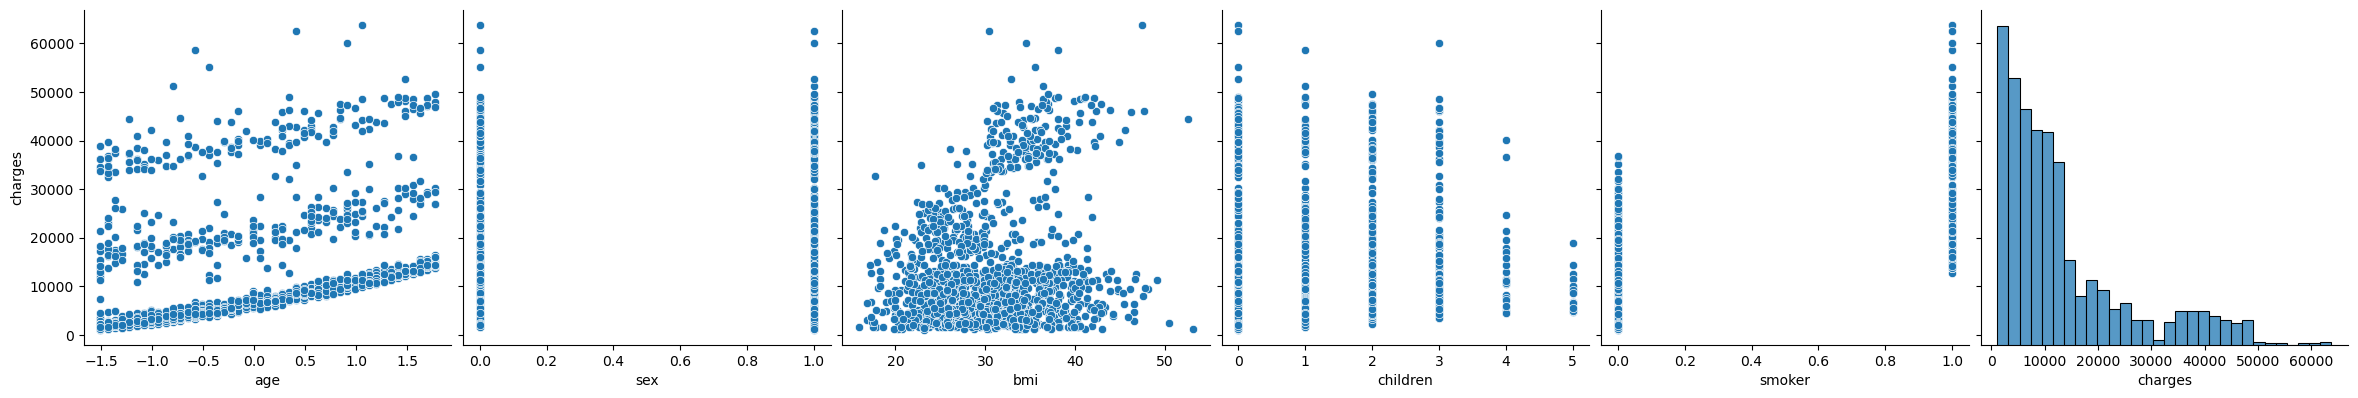

In [6]:
# Melihat keterhubungan antar fitur
sns.pairplot(dataset, x_vars=['age','sex', 'bmi','children', 'smoker', 'charges'], y_vars=['charges'], size=4, aspect=1, kind='scatter')
plt.show()

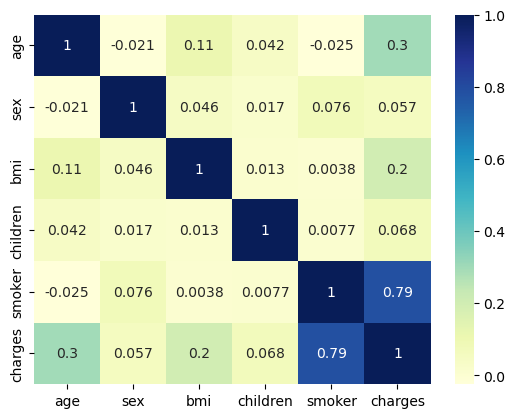

In [7]:
# Melihat visualisasi korelasi dengan heatmap
sns.heatmap(dataset.corr(), cmap='YlGnBu', annot=True)
plt.show()

## **-Splitting Data-**

In [8]:
# Memisahkan variabel respons (charges) dan variabel prediktor
X = dataset[['age','sex', 'bmi','children', 'smoker']]
y = dataset['charges']

In [9]:
# Splitting data train dan data test
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

In [10]:
# Scalling Fitur / menyesuaikan agar nilai2 yang akan digunakan saat pengolahan sesuai dengan algoritma machine learning
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [11]:
# Pembuatan model dan training data dengan jenis model SVR 
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_sc, y_train)

SVR()

In [12]:
# Prediksi model Linear Regression
y_pred = svr_model.predict(X_test_sc)

In [13]:
# Evaluasi kualitas train model Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [14]:
# Print hasil evaluasi dengan model Linear Regression
print(f'MSE_Score Linear Regression : {mse}')
print(f'MAE_Score Linear Regression : {mae}')
print(f'R2_Score Linear Regression : {r2_score}')

MSE_Score Linear Regression : 174844168.0728127
MAE_Score Linear Regression : 8563.845604154736
R2_Score Linear Regression : -0.0987507664890721


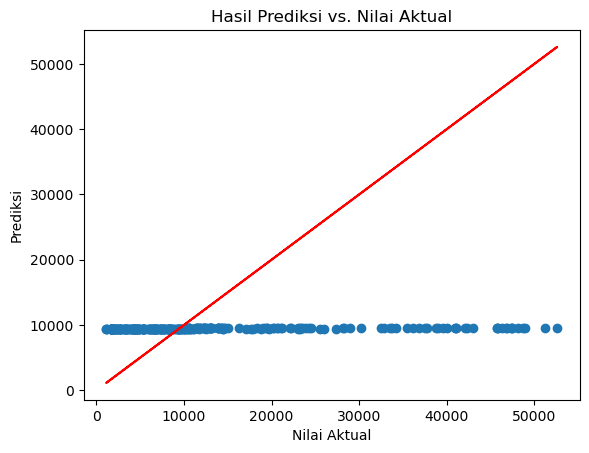

In [15]:
# Visualisasi hasil prediksi vs. nilai aktual pada data uji
plt.scatter(y_test, y_pred, label='Data Uji')
plt.plot(y_test, y_test, color='red', label='Line of Best Fit')
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Hasil Prediksi vs. Nilai Aktual")
plt.show()
